# STATISTICAL ANALYSIS ON THE DIFFERENCE AMONG THE GROWTH OF 3 TREAMENT GROUPS OF PLANTS

## $Karl  Isaiah  D.  Buenafe$

In [2]:
import numpy as np
import scipy.stats as spt
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
DF= pd.read_csv('plantgrowth.csv')

### INTRODUCTION
#### This report discusses the data gathered from an experiment on whether the 3 groups of plants had significat differences o their growth.

#### NULL HYPOTHESIS  $(H_0)$ : There is no significant difference on weight between treatment groups.


#### ALTERNATIVE HYPOTHESIS  $(H_1)$ : There's a significant difference between the treatment groups

### METHODOLOGY

#### This analysis will use the Shapiro-Wilk Test to examine distribution of the data. It will then be followed by an ANOVA test to see if there's a significant difference between the average weight of the 3 treatment groups. An alternative treatment would be the Kruskal-Wallis Test.

### RESULTS 

In [16]:
DF

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


### Control group:

In [49]:
ctrl=DF[DF['group']=='ctrl']
ctrl.head(10)

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


### Treatment group 1:

In [35]:
trt1=DF[DF['group']=='trt1']
trt1.head(10)

,weight,group
10,4.81,trt1
11,4.17,trt1
12,4.41,trt1
13,3.59,trt1
14,5.87,trt1
15,3.83,trt1
16,6.03,trt1
17,4.89,trt1
18,4.32,trt1
19,4.69,trt1


### Treatment group 2:

In [36]:
trt2=DF[DF['group']=='trt2']
trt2.head(10)

,weight,group
20,6.31,trt2
21,5.12,trt2
22,5.54,trt2
23,5.50,trt2
24,5.37,trt2
25,5.29,trt2
26,4.92,trt2
27,6.15,trt2
28,5.80,trt2
29,5.26,trt2


## Shapiro-Wilk Test:

In [38]:
Sw_ctrl= spt.shapiro(ctrl['weight'])
Sw_trt1= spt.shapiro(trt1['weight'])
Sw_trt2= spt.shapiro(trt2['weight'])

print(f'Shapiro-Wilk Test for the control group: {Sw_ctrl}')
print(f'Shapiro-Wilk Test for the treatment group 1: {Sw_trt1}')
print(f'Shapiro-Wilk Test for the treatment group 2: {Sw_trt2}')

Shapiro-Wilk Test for the control group: ShapiroResult(statistic=0.9566816687583923, pvalue=0.747475802898407)
Shapiro-Wilk Test for the treatment group 1: ShapiroResult(statistic=0.9304107427597046, pvalue=0.4519447386264801)
Shapiro-Wilk Test for the treatment group 2: ShapiroResult(statistic=0.9410051703453064, pvalue=0.5642521977424622)


### ANOVA Test:

In [92]:
if Sw_ctrl.pvalue>0.05 and Sw_trt1.pvalue>0.05 and Sw_trt2.pvalue>0.05:
    F_Statistics,p_value = spt.f_oneway(ctrl['weight'],trt1['weight'],trt2['weight'])
    print(f'ANOVA Test of the treatment groups: F_Statistics={F_Statistics} ,p-value={p_value}')
else:
    H_Statistics,k_value = spt.kruskal(ctrl['weight'],trt1['weight'],trt2['weight'])
    print(f'Kruskal-Wallis test of the treatment groups: F_Statistics={F_Statistics} ,p-value={k_value}')

ANOVA Test of the treatment groups: F_Statistics=4.846087862380136 ,p-value=0.0159099583256229


In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_result = pairwise_tukeyhsd(endog=DF['weight'], groups=DF['group'], alpha=0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


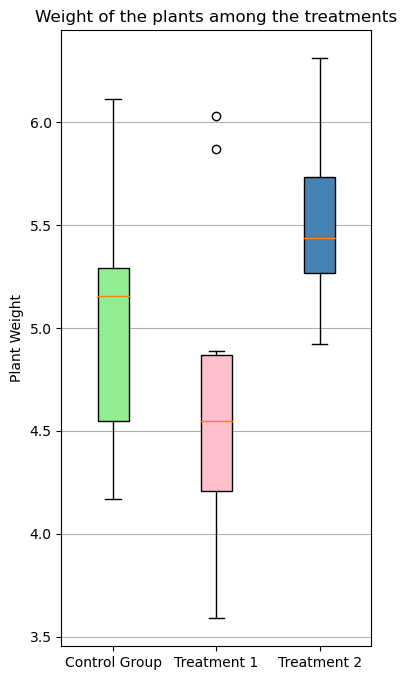

In [83]:

data = [ctrl['weight'],trt1['weight'],trt2['weight']]  # Flatten the data for boxplot
labels = ['Control Group', 'Treatment 1', 'Treatment 2']

plt.figure(figsize=(4,8))
box= plt.boxplot(data, labels=labels, patch_artist=True)

colors = ['lightgreen', 'pink', 'steelblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Weight of the plants among the treatments')
plt.ylabel('Plant Weight')
plt.grid(axis='y')

plt.show()


### DESCRIPTIVE STATISTICAL SUMMARIES

#### CONTROL GROUP

In [80]:
ctrl_stats=ctrl.describe()
ctrl_stats

,weight
count,10.000000
mean,5.032000
std,0.583091
min,4.170000
25%,4.550000
50%,5.155000
75%,5.292500
max,6.110000


#### TREATMENT GROUP 1

In [81]:
trt1_stats=trt1.describe()
trt1_stats

,weight
count,10.000000
mean,4.661000
std,0.793676
min,3.590000
25%,4.207500
50%,4.550000
75%,4.870000
max,6.030000


#### TREATMENT GROUP 2

In [82]:
trt2_stats=trt2.describe()
trt2_stats

,weight
count,10.000000
mean,5.526000
std,0.442573
min,4.920000
25%,5.267500
50%,5.435000
75%,5.735000
max,6.310000


### Discussion

In [97]:
df=[('CTRL p-value', Sw_ctrl.pvalue),('TRT1 p-value', Sw_trt1.pvalue),('TRT2 p-value', Sw_trt2.pvalue),('ANOVA test p-value', p_value),('Tukey p-value (trt1-trt2)', 0.012)]
result=pd.DataFrame(df, columns=['Measure', 'Value'])
result.head()

,Measure,Value
0,CTRL p-value,0.747476
1,TRT1 p-value,0.451945
2,TRT2 p-value,0.564252
3,ANOVA test p-value,0.015910
4,Tukey p-value (trt1-trt2),0.012000


With the p-value being greater than 0.05, this suggests that the data gathered from the 3 treatment groups are normally distributed.

However, the p-value of the ANOVA test returns with a value less than 0.05. This suggests that the there's a difference between 2 of the treatment groups. However, it cannot specify which. Therefore, we conducted another result to know which among the groups differ from each other. Based on the result,it showed us that treatment 1 and Treatment have a significant difference.

## CONCLUSION

After conducting few statistical tests, the results returned with a suggestion which is that there is a significant difference between of the groups the treatment groups. Therefore, we must REJECT THE NULL HYPOTHESIS $(H_0)$.